In [2]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [3]:
plt.rc('figure',dpi=100);

In [4]:
postulaciones = pd.read_csv("../Data/datos_navent_fiuba/fiuba_4_postulaciones.csv");
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [5]:
postulaciones['fechapostulacion']=postulaciones['fechapostulacion'].astype('datetime64[ns]');
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [6]:
postulaciones.dtypes

idaviso                      int64
idpostulante                object
fechapostulacion    datetime64[ns]
dtype: object

In [7]:
postulaciones['dia']=pd.DatetimeIndex(postulaciones['fechapostulacion']).day;
postulaciones['mes']=pd.DatetimeIndex(postulaciones['fechapostulacion']).month;
postulaciones['semana']=pd.DatetimeIndex(postulaciones['fechapostulacion']).week;
postulaciones['diadelasemana']=pd.DatetimeIndex(postulaciones['fechapostulacion']).weekday;
postulaciones['hora']=pd.DatetimeIndex(postulaciones['fechapostulacion']).hour;
dias_de_la_semana={0:'Lunes',1:'Martes',2:'Miercoles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}
postulaciones['diadelasemana'].replace(dias_de_la_semana, inplace=True)
postulaciones.head(10)

,idaviso,idpostulante,fechapostulacion,dia,mes,semana,diadelasemana,hora
0,1112257047,NM5M,2018-01-15 16:22:34,15,1,3,Lunes,16
1,1111920714,NM5M,2018-02-06 09:04:50,6,2,6,Martes,9
2,1112346945,NM5M,2018-02-22 09:04:47,22,2,8,Jueves,9
3,1112345547,NM5M,2018-02-22 09:04:59,22,2,8,Jueves,9
4,1112237522,5awk,2018-01-25 18:55:03,25,1,4,Jueves,18
5,1112277633,5awk,2018-01-29 13:34:44,29,1,5,Lunes,13
6,1112302347,5awk,2018-02-07 20:49:22,7,2,6,Miercoles,20
7,1112291495,5awk,2018-02-07 20:50:13,7,2,6,Miercoles,20
8,1112304011,5awk,2018-02-07 20:51:15,7,2,6,Miercoles,20
9,1112326289,5awk,2018-02-09 20:24:57,9,2,6,Viernes,20


In [8]:
postulaciones_febrero=postulaciones[postulaciones['mes']==2];
postulaciones_febrero.head()

,idaviso,idpostulante,fechapostulacion,dia,mes,semana,diadelasemana,hora
1,1111920714,NM5M,2018-02-06 09:04:50,6,2,6,Martes,9
2,1112346945,NM5M,2018-02-22 09:04:47,22,2,8,Jueves,9
3,1112345547,NM5M,2018-02-22 09:04:59,22,2,8,Jueves,9
6,1112302347,5awk,2018-02-07 20:49:22,7,2,6,Miercoles,20
7,1112291495,5awk,2018-02-07 20:50:13,7,2,6,Miercoles,20


In [9]:
postulaciones_enero=postulaciones[postulaciones['mes']==1];
postulaciones_enero.head()

,idaviso,idpostulante,fechapostulacion,dia,mes,semana,diadelasemana,hora
0,1112257047,NM5M,2018-01-15 16:22:34,15,1,3,Lunes,16
4,1112237522,5awk,2018-01-25 18:55:03,25,1,4,Jueves,18
5,1112277633,5awk,2018-01-29 13:34:44,29,1,5,Lunes,13
20,1112286523,ZaO5,2018-01-24 15:07:39,24,1,4,Miercoles,15
21,1112272060,ZaO5,2018-01-24 15:20:10,24,1,4,Miercoles,15


Text(0,0.5,'Cantidad de Postulaciones')

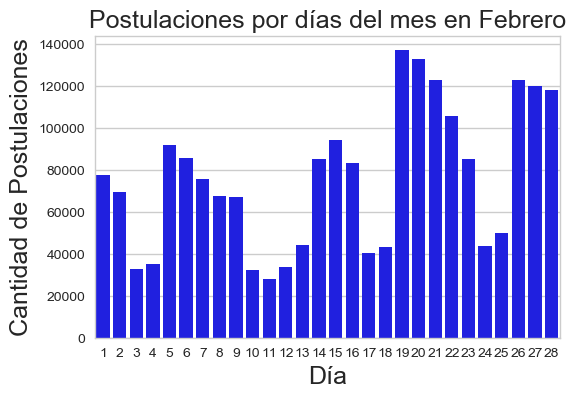

In [10]:
#utilizado.
#Podemos ver que hay una periodicidad, y una anomalia en los feriados 12 y 13 de carnaval, pareciera ser que
#los picos en postulaciones son en dias siempre laborables
g = sns.countplot(x=postulaciones_febrero['dia'], orient='v', palette=['blue'])
g.set_title("Postulaciones por días del mes en Febrero", fontsize=18)
g.set_xlabel("Día",fontsize=18)
g.set_ylabel("Cantidad de Postulaciones", fontsize=18)

Text(0,0.5,'Cantidad de Postulaciones')

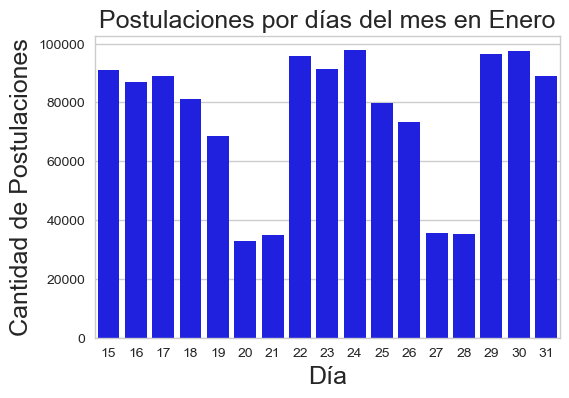

In [11]:
#utilizado.
#Misma periodicidad
g = sns.countplot(x=postulaciones_enero['dia'], orient='v', palette=['blue'])
g.set_title("Postulaciones por días del mes en Enero", fontsize=18)
g.set_xlabel("Día",fontsize=18)
g.set_ylabel("Cantidad de Postulaciones", fontsize=18)

Text(0,0.5,'Cantidad de Postulaciones')

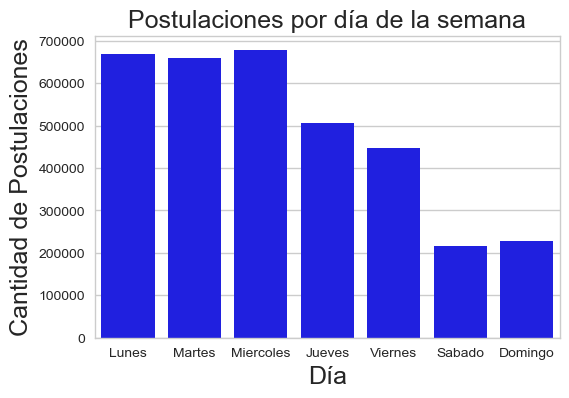

In [12]:
#utilizado.
#Periodicidad que se explica con esto
g = sns.countplot(x=postulaciones['diadelasemana'], orient='v', order=['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo'], palette=['blue'])
g.set_title("Postulaciones por día de la semana", fontsize=18)
g.set_xlabel("Día",fontsize=18)
g.set_ylabel("Cantidad de Postulaciones", fontsize=18)

Text(0,0.5,'Cantidad de Postulaciones')

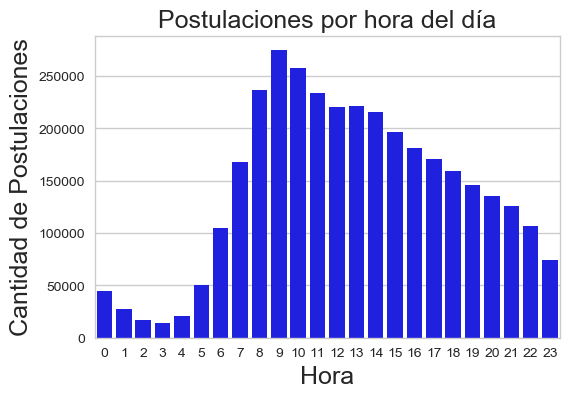

In [13]:
g = sns.countplot(x=postulaciones['hora'], orient='v', palette=['blue'])
g.set_title("Postulaciones por hora del día", fontsize=18)
g.set_xlabel("Hora",fontsize=18)
g.set_ylabel("Cantidad de Postulaciones", fontsize=18)

In [14]:
anuncios = pd.read_csv("../Data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv")
anuncios.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [15]:
anuncios.drop(['descripcion','nombre_zona','ciudad','mapacalle','denominacion_empresa','titulo'],axis=1, inplace=True);
anuncios.head()

,idaviso,idpais,tipo_de_trabajo,nivel_laboral,nombre_area
0,8725750,1,Full-time,Senior / Semi-Senior,Comercial
1,17903700,1,Full-time,Senior / Semi-Senior,Salud
2,1000150677,1,Full-time,Senior / Semi-Senior,Transporte
3,1000610287,1,Full-time,Senior / Semi-Senior,Transporte
4,1000872556,1,Full-time,Senior / Semi-Senior,Producción


In [16]:
postulaciones_detalle = pd.merge(postulaciones, anuncios, on='idaviso', how='inner');
postulaciones_detalle.head()

,idaviso,idpostulante,fechapostulacion,dia,mes,semana,diadelasemana,hora,idpais,tipo_de_trabajo,nivel_laboral,nombre_area
0,1112257047,NM5M,2018-01-15 16:22:34,15,1,3,Lunes,16,1,Part-time,Otro,Atención al Cliente
1,1112257047,1kJqGb,2018-01-15 10:23:11,15,1,3,Lunes,10,1,Part-time,Otro,Atención al Cliente
2,1112257047,eOE9Rr,2018-01-15 10:42:07,15,1,3,Lunes,10,1,Part-time,Otro,Atención al Cliente
3,1112257047,Zrx8Xz,2018-01-30 10:18:14,30,1,5,Martes,10,1,Part-time,Otro,Atención al Cliente
4,1112257047,ZrKNQY,2018-01-16 17:19:38,16,1,3,Martes,17,1,Part-time,Otro,Atención al Cliente


Text(0,0.5,'Cantidad')

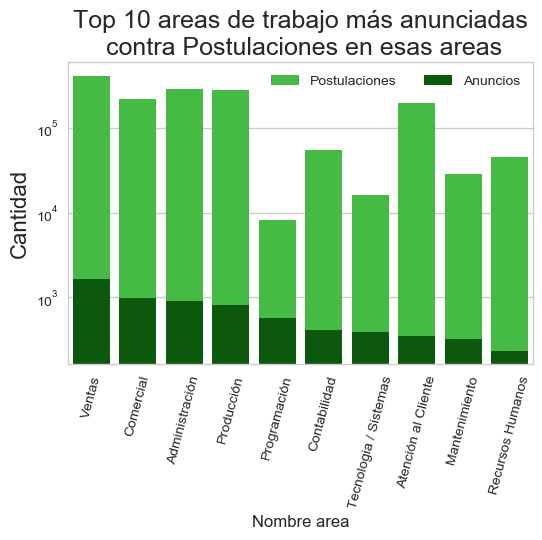

In [17]:
g = sns.countplot(x='nombre_area', data=postulaciones_detalle, order=anuncios['nombre_area'].value_counts().iloc[:10].index, orient='v', palette=['limegreen'])
g = sns.countplot(x='nombre_area', data=anuncios, order=anuncios['nombre_area'].value_counts().iloc[:10].index, orient='v', palette=['darkgreen'])
g.set_yscale('log');
g.legend(['Postulaciones','Anuncios'],ncol=2, loc='upper right');
g.set_xticklabels(g.get_xticklabels(), rotation=75, fontsize=10)
g.set_title("Top 10 areas de trabajo más anunciadas\n contra Postulaciones en esas areas", fontsize =18)
g.set_xlabel("Nombre area", fontsize = 12)
g.set_ylabel("Cantidad", fontsize = 16)

In [18]:
postulaciones_detalle['nombre_area'].value_counts().iloc[:10].index

Index(['Ventas', 'Administración', 'Producción', 'Comercial',
       'Atención al Cliente', 'Recepcionista', 'Call Center', 'Telemarketing',
       'Tesorería', 'Mantenimiento y Limpieza'],
      dtype='object')

Text(0,0.5,'Cantidad')

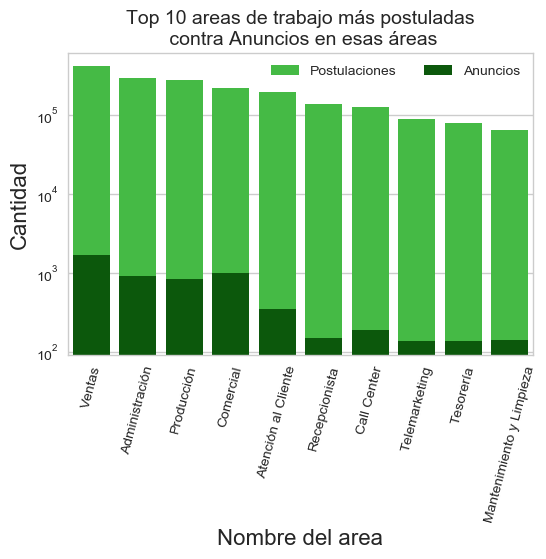

In [19]:
g = sns.countplot(x='nombre_area', data=postulaciones_detalle, order=postulaciones_detalle['nombre_area'].value_counts().iloc[:10].index, orient='v', palette=['limegreen'])
g = sns.countplot(x='nombre_area', data=anuncios, order=postulaciones_detalle['nombre_area'].value_counts().iloc[:10].index, orient='v', palette=['darkgreen'])
g.set_yscale('log');
g.legend(['Postulaciones','Anuncios'],ncol=2, loc='upper right');
g.set_xticklabels(g.get_xticklabels(), rotation=75, fontsize=10)
g.set_title("Top 10 areas de trabajo más postuladas\n contra Anuncios en esas áreas", fontsize =14)
g.set_xlabel("Nombre del area", fontsize = 16)
g.set_ylabel("Cantidad", fontsize = 16)

In [20]:
cant_post_x_area=postulaciones_detalle.groupby('nombre_area', as_index=False).agg({'idaviso':'count'});
cant_post_x_area.columns=['nombre_area','cantidad_post']
cant_post_x_area.head()

,nombre_area,cantidad_post
0,Abastecimiento,11285
1,Administracion de Seguros,4525
2,Administración,291135
3,Administración de Base de Datos,523
4,Administración de Personal,37011


In [21]:
anuncios_mejorado=anuncios.groupby('nombre_area', as_index=False).agg({'idaviso':'count'});
anuncios_mejorado.columns=['nombre_area','cantidad_avisos']
anuncios_mejorado=pd.merge(anuncios_mejorado,cant_post_x_area, on='nombre_area', how='left');
anuncios_mejorado.head(10)

,nombre_area,cantidad_avisos,cantidad_post
0,Abastecimiento,56,11285.0
1,Administracion de Seguros,18,4525.0
2,Administración,901,291135.0
3,Administración de Base de Datos,16,523.0
4,Administración de Personal,152,37011.0
5,Almacén / Depósito / Expedición,184,53261.0
6,Análisis Funcional,100,5705.0
7,Análisis de Riesgos,30,6471.0
8,Apoderado Aduanal,3,484.0
9,Arquitectura,69,7073.0


In [22]:
anuncios_mejorado['postulaciones_x_aviso']=anuncios_mejorado['cantidad_post']/anuncios_mejorado['cantidad_avisos'];
anuncios_mejorado=anuncios_mejorado[anuncios_mejorado['cantidad_post']>100];
anuncios_mejorado.sort_values('postulaciones_x_aviso',ascending=False, inplace=True);
anuncios_mejorado.head()

,nombre_area,cantidad_avisos,cantidad_post,postulaciones_x_aviso
138,Recepcionista,151,137485.0,910.496689
144,Secretaria,46,39188.0,851.913043
22,Caja,11,8921.0,811.000000
12,Asistente,22,17272.0,785.090909
24,Call Center,191,126430.0,661.937173


Text(0,0.5,'Postulaciones')

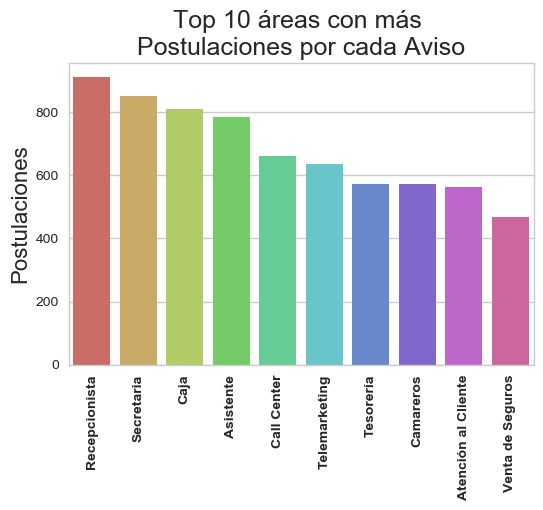

In [23]:
g = sns.barplot(x="nombre_area",y="postulaciones_x_aviso",data=anuncios_mejorado,order=anuncios_mejorado['nombre_area'].iloc[:10], orient='v', palette='hls')
g.set_title("Top 10 áreas con más \nPostulaciones por cada Aviso", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=10, weight='bold')
g.set_xlabel("",fontsize=18)
g.set_ylabel("Postulaciones", fontsize=16)

Text(0,0.5,'Postulaciones por Aviso')

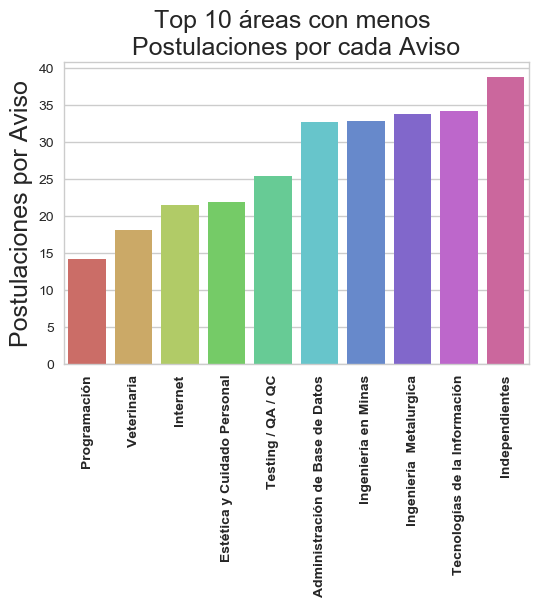

In [24]:
anuncios_mejorado.sort_values('postulaciones_x_aviso',ascending=True, inplace=True);
g = sns.barplot(x="nombre_area",y="postulaciones_x_aviso",data=anuncios_mejorado,order=anuncios_mejorado['nombre_area'].iloc[:10], orient='v', palette='hls')
g.set_title("Top 10 áreas con menos \nPostulaciones por cada Aviso", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=10, weight='bold')
g.set_xlabel("",fontsize=18)
g.set_ylabel("Postulaciones por Aviso", fontsize=18)

Text(0,0.5,'Cantidad')

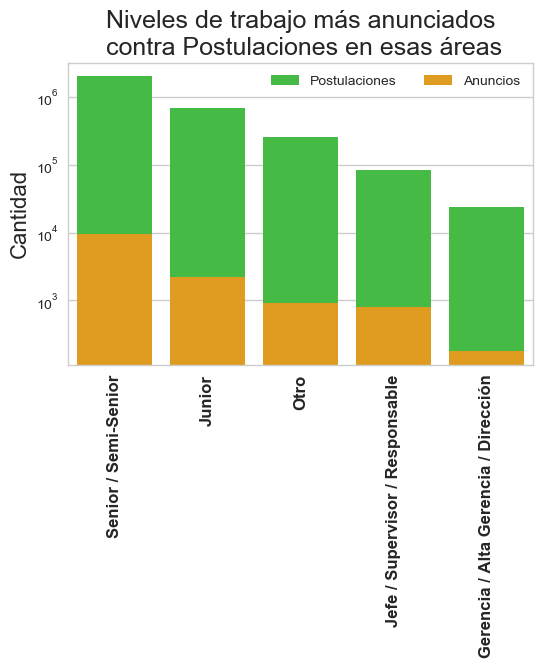

In [25]:
g = sns.countplot(x='nivel_laboral', data=postulaciones_detalle, order=anuncios['nivel_laboral'].value_counts().index, orient='v', palette=['limegreen'])
g = sns.countplot(x='nivel_laboral', data=anuncios, order=anuncios['nivel_laboral'].value_counts().index, orient='v', palette=['orange'])
g.set_yscale('log');
g.legend(['Postulaciones','Anuncios'],ncol=2, loc='upper right');
g.set_xticklabels(g.get_xticklabels(), rotation=90, fontsize=12, weight='bold')
g.set_title("Niveles de trabajo más anunciados\n contra Postulaciones en esas áreas", fontsize =18)
g.set_xlabel("", fontsize = 12)
g.set_ylabel("Cantidad", fontsize = 16)

Text(0,0.5,'Cantidad')

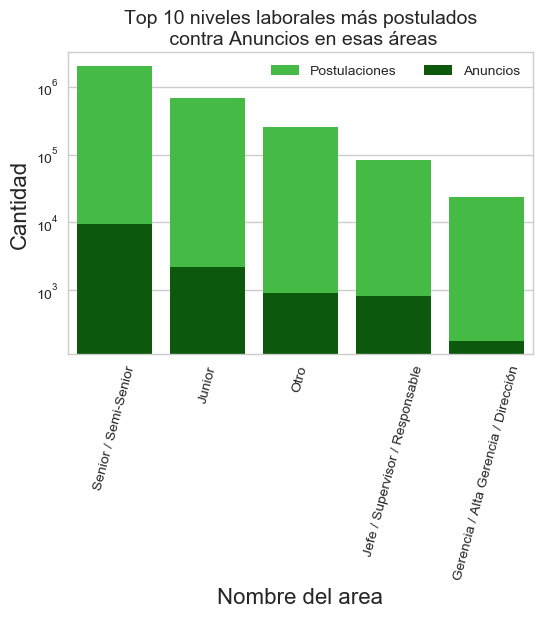

In [26]:
g = sns.countplot(x='nivel_laboral', data=postulaciones_detalle, order=postulaciones_detalle['nivel_laboral'].value_counts().iloc[:10].index, orient='v', palette=['limegreen'])
g = sns.countplot(x='nivel_laboral', data=anuncios, order=postulaciones_detalle['nivel_laboral'].value_counts().iloc[:10].index, orient='v', palette=['darkgreen'])
g.set_yscale('log');
g.legend(['Postulaciones','Anuncios'],ncol=2, loc='upper right');
g.set_xticklabels(g.get_xticklabels(), rotation=75, fontsize=10)
g.set_title("Top 10 niveles laborales más postulados\n contra Anuncios en esas áreas", fontsize =14)
g.set_xlabel("Nombre del area", fontsize = 16)
g.set_ylabel("Cantidad", fontsize = 16)